In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
sns.set_palette('muted')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
import warnings
warnings.filterwarnings('ignore')

from tqdm.auto import tqdm

In [4]:
df = pd.read_excel('C:\Python\토이프로젝트\Data\맛집리스트_최종.xlsx')
df

,음식점명,응답자 성별,맛집 카테고리,방문 목적,최애 메뉴 (복수 입력 가능),맛집 평점,키워드1,키워드2,키워드3,키워드4,키워드5,평점_네이버,방문자 리뷰수,블로그 리뷰수
0,알부자,남자,술,친구들과의 모임,알찜,5.00,"""음식이 맛있어요""","""양이 많아요""","""재료가 신선해요""","""친절해요""","""특별한 메뉴가 있어요""",4.38,"3,286","1,442"
1,야마야을지로,여자,술,친구들과의 모임,"가라아게, 모츠나베",5.00,"""음식이 맛있어요""","""특별한 메뉴가 있어요""","""친절해요""","""매장이 청결해요""","""재료가 신선해요""",4.37,641,439
2,세월마차,남자,술,친구들과의 모임,"오돌뼈, 계란전",5.00,"""기본 안주가 좋아요""","""음식이 맛있어요""","""친절해요""","""가성비가 좋아요""","""특별한 메뉴가 있어요""",4.53,123,110
3,하쿠텐라멘,남자,밥,데이트,매운 이에케 라멘,4.20,"""음식이 맛있어요""","""친절해요""","""혼밥하기 좋아요""","""특별한 메뉴가 있어요""","""양이 많아요""",4.58,310,311
4,떡도리탕강남본점,여자,밥,친구들과의 모임,떡도리탕,5.00,"""음식이 맛있어요""","""양이 많아요""","""친절해요""","""특별한 메뉴가 있어요""","""매장이 넓어요""",4.47,"1,486","1,883"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,강남명전,남자,술,친구들과의 모임,"치즈감자전, 마늘수육&보쌈김치",4.50,"""음식이 맛있어요""","""특별한 메뉴가 있어요""","""친절해요""","""매장이 넓어요""","""단체모임 하기 좋아요""",4.31,605,541
105,호요,여자,술,데이트,"연어 사시미, 히로시마풍 오꼬노미야끼",4.45,"""음식이 맛있어요""","""술이 다양해요""","""친절해요""","""특별한 메뉴가 있어요""","""기본 안주가 좋아요""",4.6,530,506
106,봉고기,남자,밥,친구들과의 모임,등심덧살,4.35,"""음식이 맛있어요""","""친절해요""","""재료가 신선해요""","""매장이 청결해요""","""매장이 넓어요""",4.54,"2,872",842
107,담산,남자,밥,데이트,양푼등갈비찜,4.50,"""음식이 맛있어요""","""친절해요""","""재료가 신선해요""","""양이 많아요""","""특별한 메뉴가 있어요""",4.59,"1,658","1,270"


# 1. 시각화

## 1.1. 현황분석

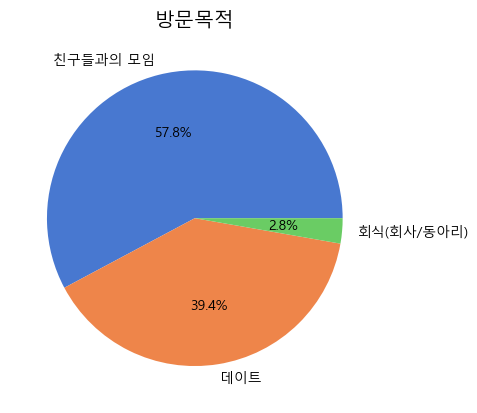

In [5]:
df['방문 목적'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('방문목적')
plt.show()

In [6]:
df['맛집 카테고리'].unique()

array(['술', '밥', '카페'], dtype=object)

In [7]:
df.head()

,음식점명,응답자 성별,맛집 카테고리,방문 목적,최애 메뉴 (복수 입력 가능),맛집 평점,키워드1,키워드2,키워드3,키워드4,키워드5,평점_네이버,방문자 리뷰수,블로그 리뷰수
0,알부자,남자,술,친구들과의 모임,알찜,5.0,"""음식이 맛있어요""","""양이 많아요""","""재료가 신선해요""","""친절해요""","""특별한 메뉴가 있어요""",4.38,"3,286","1,442"
1,야마야을지로,여자,술,친구들과의 모임,"가라아게, 모츠나베",5.0,"""음식이 맛있어요""","""특별한 메뉴가 있어요""","""친절해요""","""매장이 청결해요""","""재료가 신선해요""",4.37,641,439
2,세월마차,남자,술,친구들과의 모임,"오돌뼈, 계란전",5.0,"""기본 안주가 좋아요""","""음식이 맛있어요""","""친절해요""","""가성비가 좋아요""","""특별한 메뉴가 있어요""",4.53,123,110
3,하쿠텐라멘,남자,밥,데이트,매운 이에케 라멘,4.2,"""음식이 맛있어요""","""친절해요""","""혼밥하기 좋아요""","""특별한 메뉴가 있어요""","""양이 많아요""",4.58,310,311
4,떡도리탕강남본점,여자,밥,친구들과의 모임,떡도리탕,5.0,"""음식이 맛있어요""","""양이 많아요""","""친절해요""","""특별한 메뉴가 있어요""","""매장이 넓어요""",4.47,"1,486","1,883"


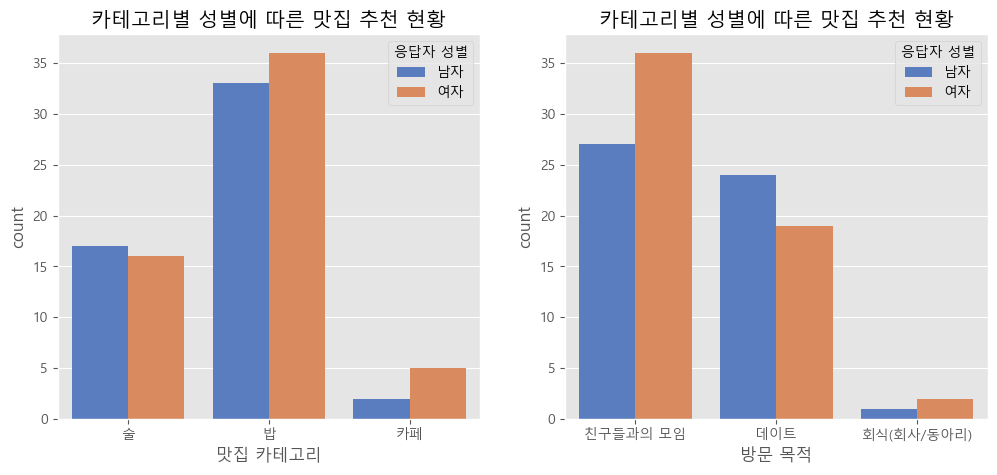

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(data=df, x='맛집 카테고리', hue='응답자 성별', palette='muted')
plt.title('카테고리별 성별에 따른 맛집 추천 현황')

plt.subplot(122)
sns.countplot(data=df, x='방문 목적', hue='응답자 성별')
plt.title('카테고리별 성별에 따른 맛집 추천 현황')

plt.show()

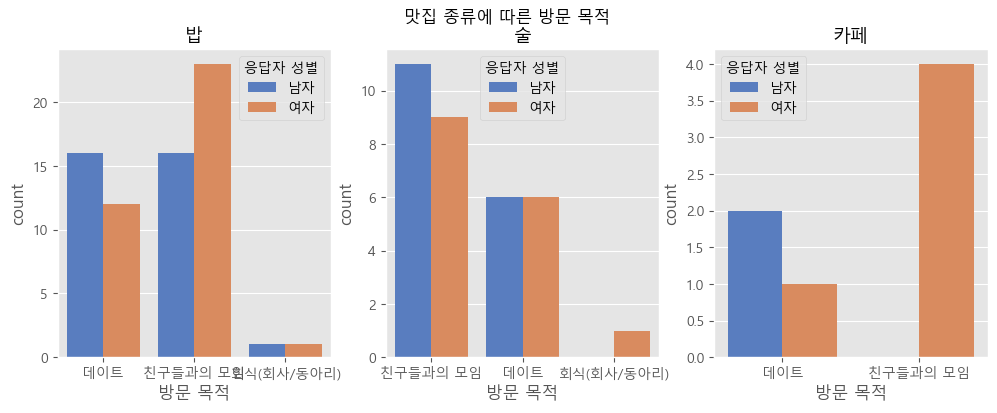

In [9]:
# 밥 먹을 때 모임 목적
plt.figure(figsize=(12,4))

plt.subplot(131)
sns.countplot(data = df[df['맛집 카테고리'] == '밥'], x='방문 목적', hue='응답자 성별')
plt.title('밥', size=13)

plt.subplot(132)
sns.countplot(data = df[df['맛집 카테고리'] == '술'], x='방문 목적', hue='응답자 성별')
plt.title('술', size=13)

plt.subplot(133)
sns.countplot(data = df[df['맛집 카테고리'] == '카페'], x='방문 목적', hue='응답자 성별')
plt.title('카페', size=13)

plt.suptitle('맛집 종류에 따른 방문 목적')
plt.show()

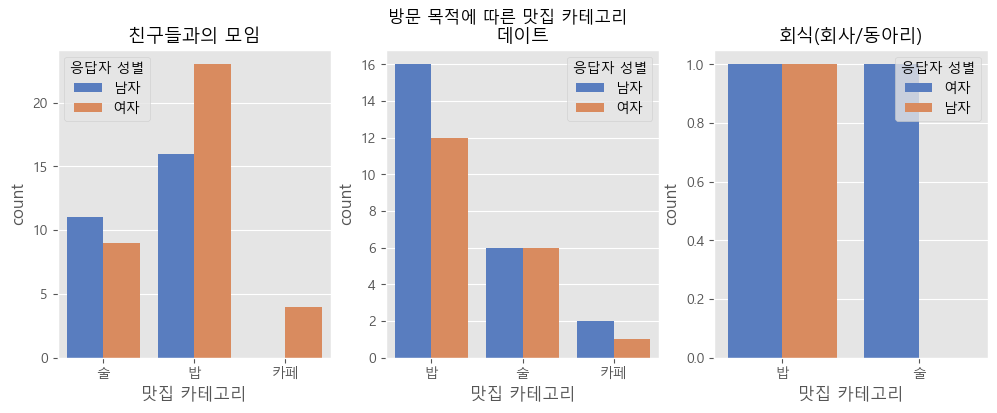

In [10]:
#모임 목적에 따른 식사 종류
plt.figure(figsize=(12,4))

plt.subplot(131)
sns.countplot(data = df[df['방문 목적'] == '친구들과의 모임'], x='맛집 카테고리', hue='응답자 성별')
plt.title('친구들과의 모임', size=13)

plt.subplot(132)
sns.countplot(data = df[df['방문 목적'] == '데이트'], x='맛집 카테고리', hue='응답자 성별')
plt.title('데이트', size=13)

plt.subplot(133)
sns.countplot(data = df[df['방문 목적'] == '회식(회사/동아리)'], x='맛집 카테고리', hue='응답자 성별')
plt.title('회식(회사/동아리)', size=13)

plt.suptitle('방문 목적에 따른 맛집 카테고리')
plt.show()

- 남성 응답자 중 맛집으로 회식장소를 기입한 경우가 없음
- 남성 응답자 중 맛집으로 카페를 기입한 경우가 없음
* '회식'만 남녀 색깔이 다름 -> 어떻게 바꾸는지 고민 필요

## 1.2. 워드클라우드

In [11]:
# 키워드 순위별 종류
len(df['키워드1'].unique()), len(df['키워드2'].unique()), len(df['키워드3'].unique()), len(df['키워드4'].unique()), len(df['키워드5'].unique())

(8, 14, 16, 18, 21)

In [12]:
from wordcloud import WordCloud
from collections import Counter

In [13]:
Counter(df['키워드1'])

Counter({'"음식이 맛있어요"': 96,
         '"기본 안주가 좋아요"': 1,
         'x': 3,
         '"디저트가 맛있어요"': 3,
         '"인테리어가 멋져요"': 2,
         '"가성비가 좋아요"': 1,
         '"친절해요"': 1,
         '"커피가 맛있어요"': 2})

In [14]:
df['키워드2'].unique()

array(['"양이 많아요"', '"특별한 메뉴가 있어요"', '"음식이 맛있어요"', '"친절해요"', nan,
       '"음료가 맛있어요"', '"재료가 신선해요"', '"가성비가 좋아요"', '"커피가 맛있어요"',
       '"인테리어가 멋져요"', '"술이 다양해요"', '"혼밥하기 좋아요"', '"매장이 넓어요"',
       '"대화하기 좋아요"'], dtype=object)

In [28]:
df_남성응답자 = df[df['응답자 성별']=='남자']
df_여성응답자 = df[df['응답자 성별']=='여자']

In [29]:
# 워드 클라우드를 위한 키워드 1~5 병합
keyword_남성 = Counter(pd.concat([df_남성응답자['키워드1'],  df_남성응답자['키워드2'], df_남성응답자['키워드3'], df_남성응답자['키워드4'], df_남성응답자['키워드5']]).dropna())
keyword_여성 = Counter(pd.concat([df_여성응답자['키워드1'],  df_여성응답자['키워드2'], df_여성응답자['키워드3'], df_여성응답자['키워드4'], df_여성응답자['키워드5']]).dropna())

In [30]:
keyword_남성

Counter({'"음식이 맛있어요"': 48,
         '"기본 안주가 좋아요"': 1,
         '"디저트가 맛있어요"': 1,
         'x': 2,
         '"가성비가 좋아요"': 25,
         '"인테리어가 멋져요"': 9,
         '"친절해요"': 49,
         '"양이 많아요"': 20,
         '"음료가 맛있어요"': 2,
         '"재료가 신선해요"': 24,
         '"특별한 메뉴가 있어요"': 25,
         '"혼밥하기 좋아요"': 9,
         '"매장이 넓어요"': 9,
         '"술이 다양해요"': 3,
         '"특별한 날 가기 좋아요"': 4,
         '"단체모임 하기 좋아요"': 5,
         '"커피가 맛있어요"': 2,
         '"매장이 청결해요"': 10,
         '"주차하기 편해요"': 1,
         '"화장실이 깨끗해요"': 1,
         '"대화하기 좋아요"': 2})

In [31]:
keyword_여성

Counter({'"음식이 맛있어요"': 51,
         'x': 1,
         '"인테리어가 멋져요"': 23,
         '"디저트가 맛있어요"': 5,
         '"커피가 맛있어요"': 5,
         '"특별한 메뉴가 있어요"': 31,
         '"양이 많아요"': 21,
         '"친절해요"': 51,
         '"재료가 신선해요"': 24,
         '"술이 다양해요"': 3,
         '"혼밥하기 좋아요"': 6,
         '"대화하기 좋아요"': 4,
         '"매장이 넓어요"': 7,
         '"가성비가 좋아요"': 16,
         '"음료가 맛있어요"': 5,
         '"매장이 청결해요"': 15,
         '"음악이 좋아요"': 1,
         '"단체모임 하기 좋아요"': 2,
         '"특별한 날 가기 좋아요"': 6,
         '"기본 안주가 좋아요"': 2,
         '"사진이 잘 나와요"': 1,
         '"오래 머무르기 좋아요"': 1})

In [73]:
# 워드 클라우드를 위한 키워드 1~5 병합
keyword = Counter(pd.concat([df['키워드1'],  df['키워드2'], df['키워드3'], df['키워드4'], df['키워드5']]).dropna())
keyword

Counter({'"음식이 맛있어요"': 99,
         '"기본 안주가 좋아요"': 3,
         'x': 3,
         '"디저트가 맛있어요"': 6,
         '"인테리어가 멋져요"': 32,
         '"가성비가 좋아요"': 41,
         '"친절해요"': 100,
         '"커피가 맛있어요"': 7,
         '"양이 많아요"': 41,
         '"특별한 메뉴가 있어요"': 56,
         '"음료가 맛있어요"': 7,
         '"재료가 신선해요"': 48,
         '"술이 다양해요"': 6,
         '"혼밥하기 좋아요"': 15,
         '"매장이 넓어요"': 16,
         '"대화하기 좋아요"': 6,
         '"매장이 청결해요"': 25,
         '"음악이 좋아요"': 1,
         '"특별한 날 가기 좋아요"': 10,
         '"단체모임 하기 좋아요"': 7,
         '"주차하기 편해요"': 1,
         '"사진이 잘 나와요"': 1,
         '"화장실이 깨끗해요"': 1,
         '"오래 머무르기 좋아요"': 1})

In [32]:
wc = WordCloud(font_path='malgun', background_color="white", max_font_size=60)

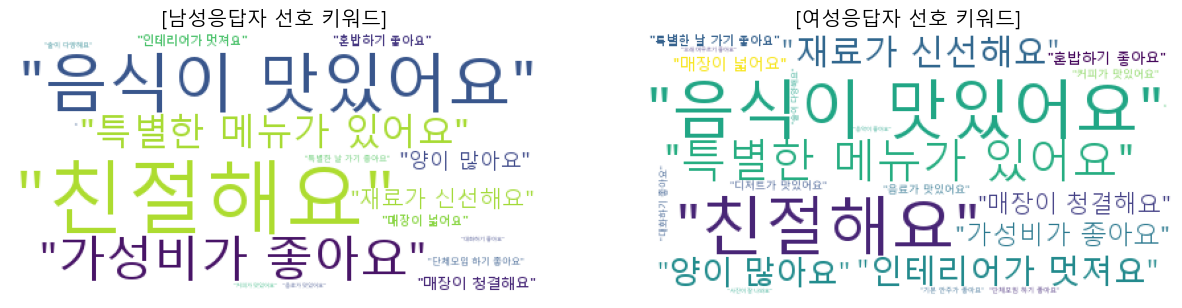

In [42]:
plt.figure(figsize=(15,10))

plt.subplot(121)
plt.imshow(wc.generate_from_frequencies(keyword_남성))
plt.axis('off')
plt.title('[남성응답자 선호 키워드]')

plt.subplot(122)
plt.imshow(wc.generate_from_frequencies(keyword_여성))
plt.axis('off') #테두리 선 없애기
plt.title('[여성응답자 선호 키워드]')

plt.show()